# Support Vector Machine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simple example

In [ ]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
    X, y, kernel="linear", C=1.0, gamma=2, degree=3, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=gamma, degree=degree, C=C).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

    return clf

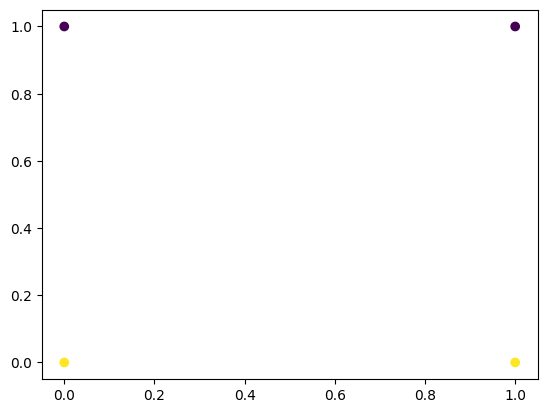

In [ ]:
test_1_X = np.array([
    [1, 1],
    [0, 1],
    [0, 0],
    [1, 0]
])

test_1_y = np.array([0, 0, 1, 1])

plt.scatter(test_1_X[:, 0], test_1_X[:, 1], c=test_1_y)

In [ ]:
from sklearn.svm import SVC

test_clf_1 = SVC(kernel='linear')
test_clf_1.fit(test_1_X, test_1_y)

SVC(kernel='linear')

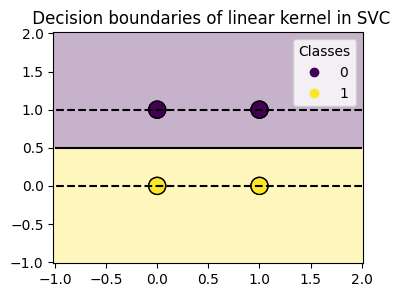

In [ ]:
test_clf_1 = plot_training_data_with_decision_boundary(test_1_X, test_1_y)

In [ ]:
test_clf_1.score(test_1_X, test_1_y)

1.0

# Example 2

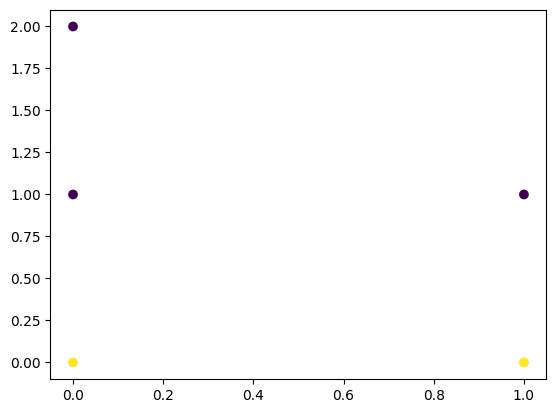

In [ ]:
test_2_X = np.array([
    [1, 1],
    [0, 2],
    [0, 1],
    [0, 0],
    [1, 0]
])

test_2_y = np.array([0, 0, 0, 1, 1])

plt.scatter(test_2_X[:, 0], test_2_X[:, 1], c=test_2_y)

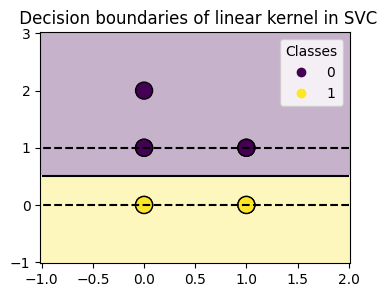

In [ ]:
test_clf_1 = plot_training_data_with_decision_boundary(test_2_X, test_2_y)

## Example 3

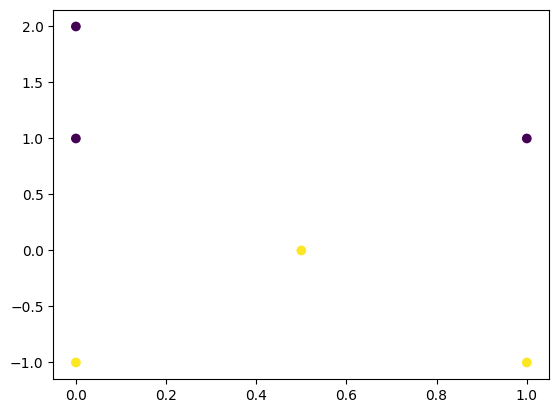

In [ ]:
test_3_X = np.array([
    [0, 1],
    [0, 2],
    [1, 1],
    [0, -1],
    [0.5, 0],
    [1, -1],
])
test_3_y = np.array([
    0, 0, 0, 1, 1, 1
])

plt.scatter(test_3_X[:, 0], test_3_X[:, 1], c=test_3_y)

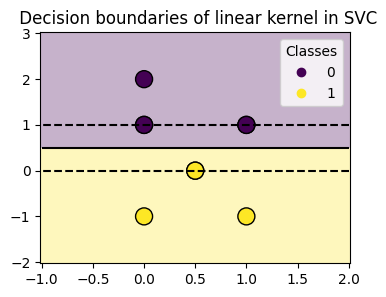

In [ ]:
test_clf_3 = plot_training_data_with_decision_boundary(test_3_X, test_3_y, C=10000)

## Example XOR

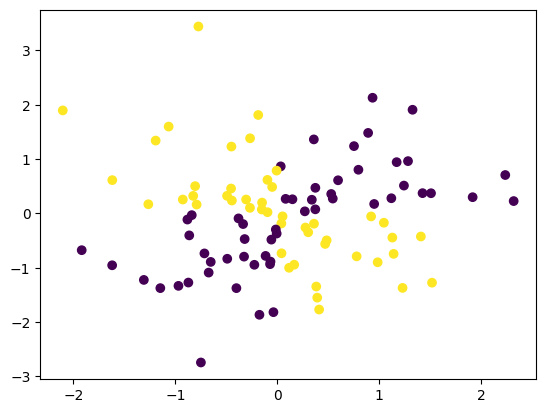

In [ ]:
X_xor = np.random.randn(100, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0).astype(int)

plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor)

0.94

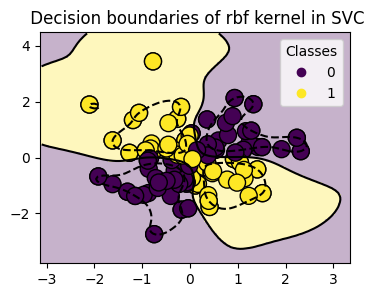

In [ ]:
test_clf_1 = plot_training_data_with_decision_boundary(X_xor, y_xor, kernel="rbf", ga=4)
test_clf_1.score(X_xor, y_xor)

# Iris Species

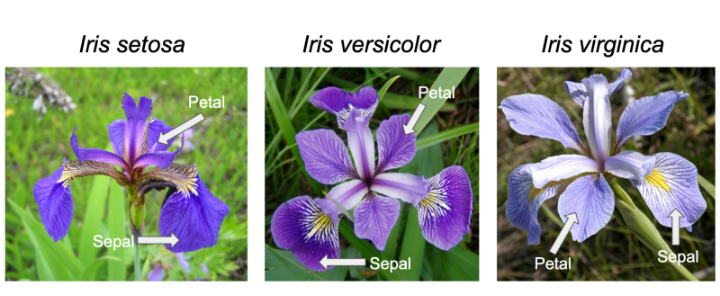

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_2_X = iris.data[:, :2]
iris_X = iris.data
iris_y = iris.target

In [ ]:
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'Sepal width')

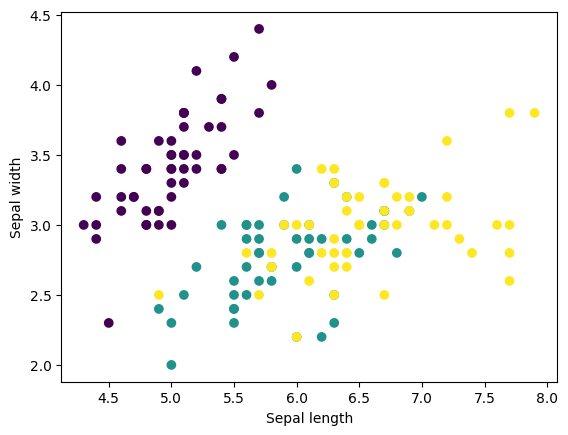

In [ ]:
plt.scatter(iris_2_X[:, 0], iris_2_X[:, 1], c=iris_y)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [ ]:
iris_clf = svm.SVC(kernel="linear", C=1, decision_function_shape="ovo")
iris_clf.fit(iris_2_X, iris_y)

SVC(C=1, decision_function_shape='ovo', kernel='linear')

In [ ]:
iris_clf.score(iris_2_X, iris_y)

0.82

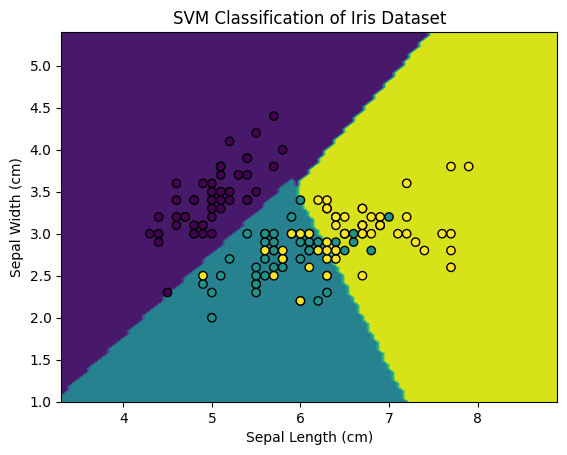

In [ ]:
DecisionBoundaryDisplay.from_estimator(
    iris_clf, iris_2_X,
    response_method="predict",
)

# Plot the data points
plt.scatter(iris_2_X[:, 0], iris_2_X[:, 1], c=iris_y, edgecolors="k")
plt.title("SVM Classification of Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

In [ ]:
iris_clf.score(iris_2_X, iris_y)

0.8133333333333334

### RBF kernel

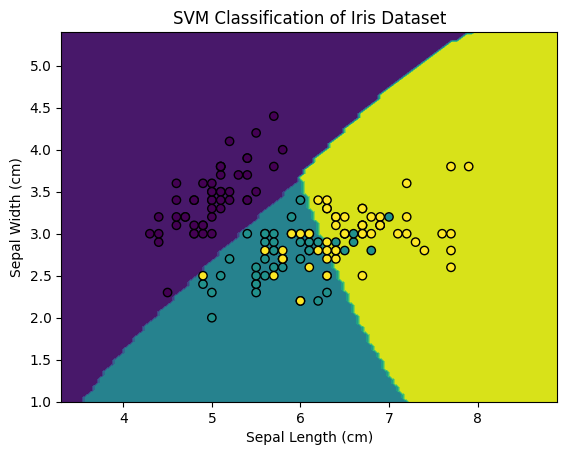

In [ ]:
iris_clf = svm.SVC(kernel="rbf", C=1, decision_function_shape="ovr")
iris_clf.fit(iris_2_X, iris_y)

DecisionBoundaryDisplay.from_estimator(
    iris_clf, iris_2_X,
    response_method="predict",
)

# Plot the data points
plt.scatter(iris_2_X[:, 0], iris_2_X[:, 1], c=iris_y, edgecolors="k")
plt.title("SVM Classification of Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

In [ ]:
iris_clf.score(iris_2_X, iris_y)

0.8133333333333334

### POLY kernel

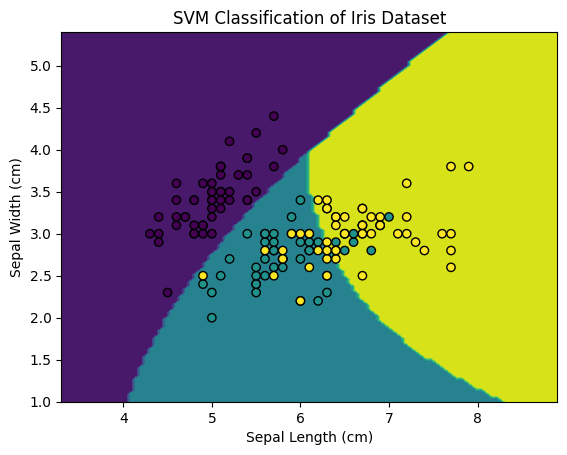

In [ ]:
iris_clf = svm.SVC(kernel="poly", C=1, decision_function_shape="ovr")
iris_clf.fit(iris_2_X, iris_y)

DecisionBoundaryDisplay.from_estimator(
    iris_clf, iris_2_X,
    response_method="predict",
)

# Plot the data points
plt.scatter(iris_2_X[:, 0], iris_2_X[:, 1], c=iris_y, edgecolors="k")
plt.title("SVM Classification of Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

In [ ]:
iris_clf.score(iris_2_X, iris_y)

0.8133333333333334

### ALL features performance

In [ ]:
iris_clf = svm.SVC(kernel="rbf", C=1, decision_function_shape="ovr")
iris_clf.fit(iris_X, iris_y)

iris_clf.score(iris_X, iris_y)

0.9733333333333334

In [ ]:
# WITH ALL THE FEATURES ACCURACY NOW 97%

# Greedsearch

In [ ]:
# But it can be impoved further move with better hyperparamers

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001], # np.linspace(0, 1, 6),
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# Fit the GridSearchCV object to the data
grid.fit(iris_X, iris_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.933 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [ ]:

# Print the best parameters found
print(grid.best_params_)

# Print the best score achieved
print(grid.best_score_)


{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
0.9800000000000001
